In [42]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [174]:
filename = 'merged_table.csv'

In [175]:
data = pd.read_csv(filename)

In [176]:
data['Category'] = [cat.split(">")[-2].strip() for cat in data['Category']]

In [177]:
category_list = data['Category']

In [178]:
category_price = data.groupby('Category',as_index=False).mean()

Category vs Sale Price Plot

In [179]:
objects = category_price['Category']
y_pos = np.arange(len(objects))
performance = category_price['Sale Price']

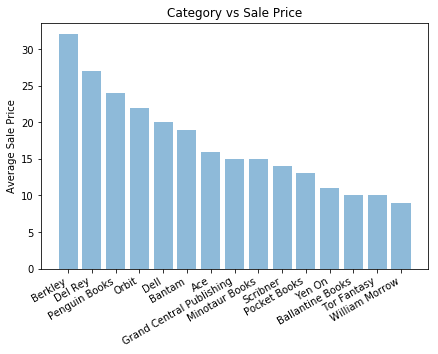

In [270]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.tight_layout()
plt.xticks(y_pos, objects,rotation = 30,horizontalalignment='right')
#plt.xticks(y_pos, objects,horizontalalignment='right')
plt.savefig('./figures/price_vs_category.jpg', bbox_inches = 'tight')
plt.ylabel('Average Sale Price')
plt.title('Category vs Sale Price') 
plt.show()

Most expensive book categories

In [181]:
category_price_top10 = category_price.nlargest(10, 'Sale Price')

In [182]:
objects = category_price_top10['Category']
y_pos = np.arange(len(objects))
performance = category_price_top10['Sale Price']

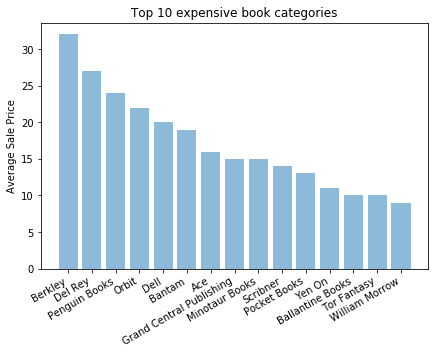

In [269]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.tight_layout()
plt.xticks(y_pos, objects,rotation = 30,horizontalalignment='right')
plt.savefig('./figures/price_vs_category_top_10.jpg', bbox_inches = 'tight')
plt.ylabel('Average Sale Price')
plt.title('Top 10 expensive book categories') 
plt.show()

Least expensive book categories

In [184]:
category_price_bottom10 = category_price.nsmallest(10, 'Sale Price')
objects = category_price_bottom10['Category']
y_pos = np.arange(len(objects))
performance = category_price_bottom10['Sale Price']

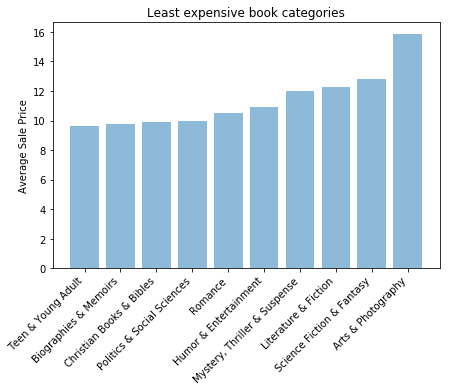

In [185]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.tight_layout()
plt.xticks(y_pos, objects,rotation = 45,horizontalalignment='right')
plt.savefig('./figures/price_vs_category_bottom_10.jpg', bbox_inches = 'tight')
plt.ylabel('Average Sale Price')
plt.title('Least expensive book categories') 
plt.show()

Sale Price vs Number of Books

In [186]:
data['Sale Price'].dropna().max()

96.65

In [188]:
data.groupby(pd.cut(data['Sale Price'],bins=[0,5,10,15,20,25,30,130])).count()

,Name,Sale Price,Category,Author,ISBN10,Pages,Publisher,Language,Dimensions,Weight,Rating
Sale Price,,,,,,,,,,,
"(0, 5]",8,8,8,8,8,8,8,8,8,8,8
"(5, 10]",224,224,224,224,224,224,224,224,224,224,224
"(10, 15]",149,149,149,149,149,149,149,149,149,149,148
"(15, 20]",64,64,64,64,64,64,64,64,63,64,61
"(20, 25]",24,24,24,24,24,23,24,24,24,24,22
"(25, 30]",7,7,7,7,7,7,7,7,7,7,6
"(30, 130]",9,9,9,9,9,9,9,9,9,9,9


In [189]:
price_books = data.groupby(pd.cut(data['Sale Price'],bins=[0,5,10,15,20,25,30,130])).count()
books = price_books['Name']
price_range = ['0-5','5-10','10-15','15-20','20-25','25-30','>30']

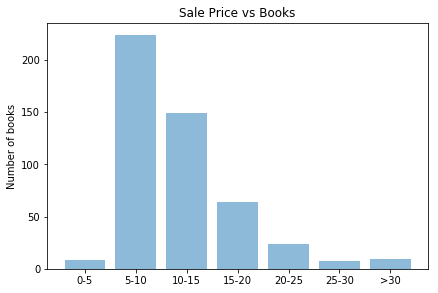

In [190]:
plt.bar(np.arange(len(books)), books, align='center', alpha=0.5)
plt.tight_layout()
plt.xticks(np.arange(len(books)), price_range,horizontalalignment='center')
plt.savefig('./figures/price_vs_num_books.jpg', bbox_inches = 'tight')
plt.ylabel('Number of books')
plt.title('Sale Price vs Books') 
plt.show()

In [191]:
price = data['Sale Price'].dropna()

C:\Users\rahul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


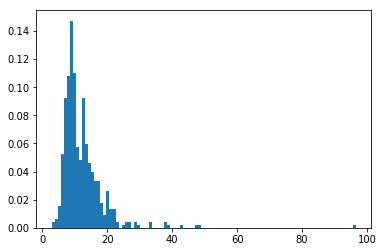

In [271]:
plt.hist(price,normed=True,bins=100)
plt.ylabel('Sale Price')
plt.xlabel('')
plt.show()

Publisher vs Price

In [248]:
publisher_price = data

In [249]:
publisher_price['Publisher'] = [pub.split(';')[0].strip() for pub in publisher_price['Publisher']]
publisher_price= publisher_price.groupby('Publisher', as_index = False)['Name'].count()
publisher_price.rename(columns = {'Name':'Num_books'},inplace=True)

In [250]:
publisher_price

,Publisher,Num_books
0,Abrams ComicArts,1
1,Ace,16
2,Ace Books,1
3,Aladdin Paperbacks,1
4,Anchor,4
5,Atria Books,2
6,Atria/Emily Bestler Books,2
7,Avon,1
8,Ballantine Books,10
9,Bantam,19


In [263]:
publisher_price_top10 = publisher_price.nlargest(15, 'Num_books')

In [264]:
publisher_price_top10

,Publisher,Num_books
13,Berkley,32
22,Del Rey,27
65,Penguin Books,24
60,Orbit,22
24,Dell,20
9,Bantam,19
1,Ace,16
36,Grand Central Publishing,15
58,Minotaur Books,15
78,Scribner,14


In [265]:
objects = publisher_price_top10['Publisher']
y_pos = np.arange(len(objects))
performance = publisher_price_top10['Num_books']

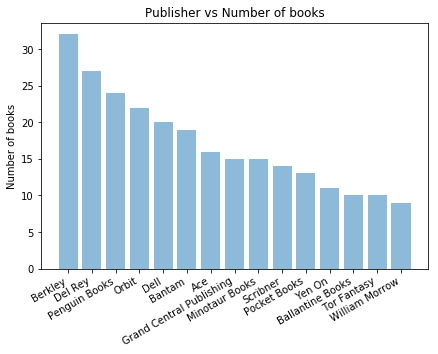

In [272]:
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.tight_layout()
plt.xticks(y_pos, objects,rotation = 30,horizontalalignment='right')
#plt.xticks(y_pos, objects,horizontalalignment='right')
#plt.savefig('./price_vs_category.jpg', bbox_inches = 'tight')
plt.ylabel('Number of books')
plt.title('Publisher vs Number of books') 
plt.show()